# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
tech_list = []
funda_list = []
macro_list = []

## Taking the AAPL for example to investigate the effect

In [3]:
freq = 'Weekly'
stock = 'AAPL'
price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
y = price.direction.shift(-1).values[:-1]
predictors = pd.read_csv('../predictors/Merged/'+freq+'/'+stock+'.csv',index_col='Date')
predictors.fillna(0,inplace=True)
X = predictors.values[:-1,]
X.shape

(525, 36)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,zero_one_loss,recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=False)


## SMOTE Balanced Dataset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

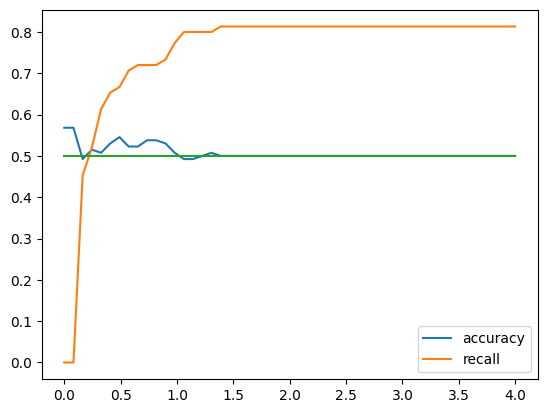

In [8]:
result1 = []
result2 = []
n = 4
for i in np.linspace(0.0000001,n,50):
    sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=5)
    X_res,y_res = sm.fit_resample(X_train,y_train)
    pipe = make_pipeline(MinMaxScaler(),LogisticRegression(C=i,dual = True,penalty = 'l2',solver='liblinear'))
    pipe.fit(X_res,y_res)
    y_pred = pipe.predict(X_test)
    # print(classification_report(y_test,y_pred))
    accuracy = zero_one_loss(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    result1.append(accuracy)
    result2.append(recall)

plt.plot(np.linspace(0.0000001,n,50),result1,label = 'accuracy')
plt.plot(np.linspace(0.0000001,n,50),result2,label = 'recall')
plt.legend()
plt.plot(np.linspace(0.0000001,n,50),[0.5]*(50))
plt.show()

## Original Dataset

In [9]:
pipe = make_pipeline(MinMaxScaler(),LogisticRegression(dual=True,penalty = 'l2',solver='liblinear'))
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.23      0.05      0.09        57
         1.0       0.55      0.87      0.67        75

    accuracy                           0.52       132
   macro avg       0.39      0.46      0.38       132
weighted avg       0.41      0.52      0.42       132

